<a href="https://colab.research.google.com/github/amityu/BigData/blob/main/hw2/HW_2_032191025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

In [13]:
!mkdir /root/.kaggle/
!pip install kaggle 
import json

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"amyuval","key":"1c309b85bf5a7e1c79a431e672976a28"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json
!ls

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
datasets  sample_data


## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [1]:
import os

from bs4 import BeautifulSoup
import requests
u = "http://news.ycombinator.com"
html = requests.get(u).content.decode('utf-8')

soup = BeautifulSoup(html, 'html.parser')
titles = soup.findAll('tr', attrs={'class': "athing"})
for title in titles:
        link = title.findAll('a', attrs={'class': "titlelink"})
        try:
                votes = title.nextSibling.find('span', attrs={'class' : 'score'}).string
        except:
                votes = '0'
        print(link[0].contents[0] + ' \nvotes ' + votes)



Do It (2004) 
votes 174 points
My lizard brain is no match for infinite scroll 
votes 614 points
Freshmeat.net, 1997-2014 (2014) 
votes 16 points
Zero rupee note (2015) 
votes 187 points
Algorithms for Modern Hardware 
votes 178 points
How to deploy software on a moving bus (2018) 
votes 11 points
Show HN: Just 5 Top headlines of the world you need to start your day with 
votes 50 points
Russia to Legalize Software Piracy 
votes 44 points
Damn Cool Algorithms: Levenshtein Automata 
votes 148 points
Introduction to GPUs with OpenGL 
votes 86 points
A Monk’s-Eye View 
votes 8 points
NaTakallam – High-quality language services and courses delivered by refugees 
votes 68 points
The campaign to shut down YouTube-dl continues 
votes 461 points
Yerka bike uses frame as lock 
votes 104 points
Binary search with confidence 
votes 57 points
I can no longer compile my first Flash game 
votes 141 points
Escaping privileged containers for fun 
votes 61 points
Cooklang – Managing Recipes in Git 
vot

**Question 2**:  Write a function that collects data on four James Bond movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [2]:
from bs4 import BeautifulSoup
import requests
u ='https://api.themoviedb.org/3/search/movie?api_key=59c27449a3531482fdbafc11b22fa914&query=James+Bond'
#j = requests.get(u).content.decode('utf-8')
j = requests.get(u).json()



In [3]:
for movie in j['results'][:4]:
        print(' --------------%s-------------------'%movie['original_title'])
        print (movie)
       

 --------------Being James Bond-------------------
{'adult': False, 'backdrop_path': '/8Bcm0qBnS6yjwTFad8eI6thzRub.jpg', 'genre_ids': [99], 'id': 869250, 'original_language': 'en', 'original_title': 'Being James Bond', 'overview': 'Daniel Craig candidly reflects on his 15 year adventure as James Bond. Including never-before-seen archival footage from Casino Royale to the upcoming 25th film No Time To Die, Craig shares his personal memories in conversation with 007 producers, Michael G Wilson and Barbara Broccoli.', 'popularity': 10.792, 'poster_path': '/jLaAbwPDzHNbJfZ0Xj0CkeM56CO.jpg', 'release_date': '2021-08-29', 'title': 'Being James Bond', 'video': False, 'vote_average': 7.8, 'vote_count': 46}
 --------------James Bond: For Real-------------------
{'adult': False, 'backdrop_path': '/Lz17qcjUuLAjHokrnmBAC1wasT.jpg', 'genre_ids': [99], 'id': 338749, 'original_language': 'en', 'original_title': 'James Bond: For Real', 'overview': "The stunts and action set pieces for the the 2006 Jam

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [10]:
import os
os.getcwd()
!mkdir ./datasets
!mkdir ./datasets/kick



mkdir: cannot create directory ‘./datasets’: File exists


In [14]:
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kick
!unzip ./datasets/kick/* -d ./datasets/kick


 87% 32.0M/36.8M [00:00<00:00, 62.2MB/s]
100% 36.8M/36.8M [00:00<00:00, 74.9MB/s]
Archive:  ./datasets/kick/kickstarter-projects.zip
  inflating: ./datasets/kick/ks-projects-201612.csv  
  inflating: ./datasets/kick/ks-projects-201801.csv  


In [6]:
# which question to answer - put your ID number and run the code 
your_id  = "032191025"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 1 and 4


**Question 1:** On average which project category received the lowest number of backers? (15 pt)

In [15]:
import pandas as pd
import os
from tqdm.notebook import  tqdm
# load the data into a Pandas DataFrame
kick_df = pd.read_csv('./datasets/kick/ks-projects-201612.csv' ,encoding='cp1252')
kick_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [16]:
import pandas as pd
import os
from tqdm.notebook import  tqdm
# load the data into a Pandas DataFrame
kick_df = pd.read_csv('./datasets/kick/ks-projects-201612.csv' ,encoding='cp1252')
#kick_df.head()
small_df = kick_df[['category ','backers ']][kick_df['backers '].apply(lambda x: x.isnumeric())]

small_df['backers '].apply(lambda x:float(x))
small_df['backers '] = small_df['backers '].astype(float)

results = small_df.groupby(['category ']).mean().sort_values('backers ')[:10]
print('Categories in ascending order, first row is the minimum')

print(results)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Categories in ascending order, first row is the minimum
                 backers 
category                 
 personalized    0.000000
 Path of Light   1.000000
 Wear Wisdom     1.000000
Crochet          8.446970
Embroidery      11.270588
Places          11.705701
Couture         12.064655
Candles         12.324859
Nature          15.785276
Video           15.810089


**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

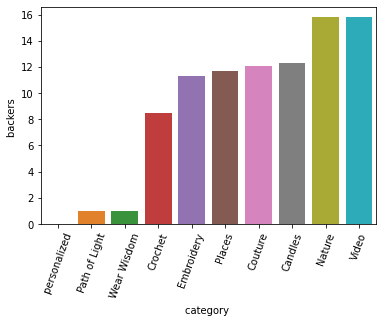

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
data = results.reset_index()
ax = sns.barplot(x = 'category ', y="backers ", data=data)
plt.xticks(rotation=70)


## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer the following questions:

In [18]:
!mkdir ./datasets/marvel
!kaggle datasets download csanhueza/the-marvel-universe-social-network -p ./datasets/marvel


  0% 0.00/2.72M [00:00<?, ?B/s]
100% 2.72M/2.72M [00:00<00:00, 90.7MB/s]


In [19]:
!unzip ./datasets/marvel/* -d ./datasets/marvel


Archive:  ./datasets/marvel/the-marvel-universe-social-network.zip
  inflating: ./datasets/marvel/edges.csv  
  inflating: ./datasets/marvel/hero-network.csv  
  inflating: ./datasets/marvel/nodes.csv  


**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [20]:
import pandas as pd
df = pd.read_csv('./datasets/marvel/hero-network.csv')
groups = df.groupby('hero1').count().reset_index()
groups.sort_values(by = 'hero2',ascending=False, inplace = True)
groups.columns = ['hero','friendliness']
print('the most frindly heros are:')
print(groups.iloc[0:10])
#df['freinds'] = groups.apply(lambda row: len(row['hero2']) )


the most frindly heros are:
                      hero  friendliness
826        CAPTAIN AMERICA          8149
5103  SPIDER-MAN/PETER PAR          6652
2555  IRON MAN/TONY STARK           5850
5520  THOR/DR. DONALD BLAK          5712
5499  THING/BENJAMIN J. GR          5369
6073      WOLVERINE/LOGAN           5230
4717  SCARLET WITCH/WANDA           5184
5836               VISION           5067
2449  HUMAN TORCH/JOHNNY S          4970
3666  MR. FANTASTIC/REED R          4788


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [21]:
from tqdm.notebook import  tqdm
import pandas as pd
import networkx as nx
df = pd.read_csv('./datasets/marvel/hero-network.csv')
nodes_df = pd.read_csv('./datasets/marvel/nodes.csv')
edges_df = pd.read_csv('./datasets/marvel/edges.csv')
#j_df = df.join(type_df, on='node')
G=nx.DiGraph()
for idx, row in tqdm(nodes_df.iterrows()):
        G.add_node(row['node'], node_type = row['type'])

for idx, row in tqdm(edges_df.iterrows()):
        G.add_edge(row['hero'], row['comic'])
        G.nodes[row['comic']]['node_type'] = 'comic'
        G.nodes[row['hero']]['node_type'] = 'hero'


for idx, row in tqdm(df.iterrows()):
        G.add_edge(row['hero1'], row['hero2'])
        G.nodes[row['hero2']]['node_type'] = 'hero'


degree_list   =list(G.degree)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [22]:
degree_list.sort(key = lambda tup:tup[1], reverse=True)
friendly_nodes = degree_list[:150]
friendly_nodes

[('CAPTAIN AMERICA', 4188),
 ('THING/BENJAMIN J. GR', 2986),
 ('THOR/DR. DONALD BLAK', 2869),
 ('HUMAN TORCH/JOHNNY S', 2825),
 ('MR. FANTASTIC/REED R', 2812),
 ('SPIDER-MAN/PETER PAR', 2563),
 ('BEAST/HENRY &HANK& P', 2475),
 ('HULK/DR. ROBERT BRUC', 2406),
 ('HAWK', 2314),
 ('IRON MAN/TONY STARK ', 2238),
 ('CYCLOPS/SCOTT SUMMER', 2201),
 ('STORM/ORORO MUNROE S', 2104),
 ('ANT-MAN/DR. HENRY J.', 2074),
 ('WOLVERINE/LOGAN ', 2036),
 ('DAREDEVIL/MATT MURDO', 2023),
 ('ANGEL/WARREN KENNETH', 2007),
 ('COLOSSUS II/PETER RA', 1964),
 ('SUB-MARINER/NAMOR MA', 1961),
 ('SHE-HULK/JENNIFER WA', 1953),
 ('SCARLET WITCH/WANDA ', 1932),
 ('MARVEL GIRL/JEAN GRE', 1916),
 ('WONDER MAN/SIMON WIL', 1861),
 ('JAMESON, J. JONAH', 1845),
 ('VISION ', 1814),
 ('INVISIBLE WOMAN/SUE ', 1796),
 ('HERCULES [GREEK GOD]', 1762),
 ('NIGHTCRAWLER/KURT WA', 1711),
 ('QUICKSILVER/PIETRO M', 1604),
 ('SPIDER-MAN/PETER PARKER', 1577),
 ('WASP/JANET VAN DYNE ', 1557),
 ('ROGUE /', 1545),
 ('DR. STRANGE/STEPHEN ', 15

In [23]:
print('Big Graph')
print('nodes: %d' % len(list(G.nodes)))
print('edges: %d' % len(list(G.edges)))
print('friendly Graph')
gf = nx.subgraph(G, [tup[0] for tup in friendly_nodes])
print('nodes: %d' % len(list(gf.nodes)))
print('edges: %d' % len(list(gf.edges)))


Big Graph
nodes: 19233
edges: 320282
friendly Graph
nodes: 150
edges: 13491


In [24]:


node_size = [tup[1] for tup in friendly_nodes]




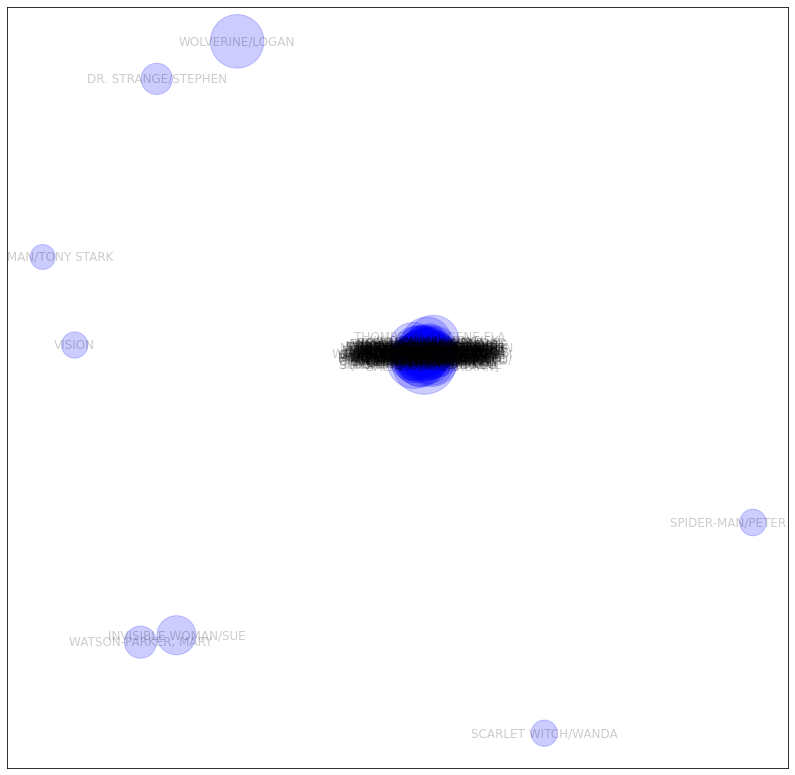

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
node_colors = []
# add node color by gender
types = nx.get_node_attributes(gf, "node_type")
for t in types:
        if t =='comic':

                node_colors.append('green')
        else:
                node_colors.append('blue')




plt.figure(3,figsize=(14,14))
nx.draw_networkx(gf, node_size = node_size, node_color= node_colors , alpha=0.2)


**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)

In [ ]:
types

{'HUDSON, HEATHER': 'hero',
 'HOGUN [ASGARDIAN]': 'hero',
 'MOCKINGBIRD/DR. BARB': 'hero',
 'PUNISHER II/FRANK CA': 'hero',
 'NELSON, FRANKLIN FOG': 'hero',
 'KA-ZAR/KEVIN PLUNDER': 'hero',
 'THOMPSON, EUGENE FLA': 'hero',
 'SHE-HULK/JENNIFER WA': 'hero',
 'THOR/DR. DONALD BLAK': 'hero',
 'ROGUE /': 'hero',
 'GALACTUS/GALAN': 'hero',
 'MACTAGGERT, MOIRA KI': 'hero',
 'ANT-MAN/DR. HENRY J.': 'hero',
 'HAVOK/ALEX SUMMERS ': 'hero',
 'SUB-MARINER/NAMOR MA': 'hero',
 'BEAST/HENRY &HANK& P': 'hero',
 'PARKER, MAY': 'hero',
 'MOON KNIGHT/MARC SPE': 'hero',
 'NORRISS, SISTER BARB': 'hero',
 'ROBERTSON, JOE': 'hero',
 'QUICKSILVER/PIETRO M': 'hero',
 'MEPHISTO': 'hero',
 'USAGENT/CAPTAIN JOHN': 'hero',
 'DUGAN, TIMOTHY ALOYI': 'hero',
 'JARVIS, EDWIN ': 'hero',
 'LOKI [ASGARDIAN]': 'hero',
 'JAMESON, J. JONAH': 'hero',
 'JUSTICE II/VANCE AST': 'hero',
 'MEDUSA/MEDUSALITH AM': 'hero',
 'THUNDERBIRD II/JAMES': 'hero',
 'TIGRA/GREER NELSON': 'hero',
 'WASP/JANET VAN DYNE ': 'hero',
 'SASQUATCH/WA